In [1]:
#Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

#Important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#from google.colab import files
#files.upload()

In [4]:
import pandas as pd


In [5]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

**EDA**

In [6]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
168,65.0,0,582,1,40,0,270000.00,1.00,138,0,0,140,0
193,73.0,1,231,1,30,0,160000.00,1.18,142,1,1,180,0
80,70.0,0,69,0,40,0,293000.00,1.70,136,0,0,75,0
166,53.0,0,196,0,60,0,220000.00,0.70,133,1,1,134,0
150,72.0,0,233,0,45,1,235000.00,2.50,135,0,0,115,1
194,45.0,0,582,0,20,1,126000.00,1.60,135,1,0,180,1
255,52.0,1,191,1,30,1,334000.00,1.00,142,1,1,216,0
135,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0
293,63.0,1,103,1,35,0,179000.00,0.90,136,1,1,270,0
258,45.0,1,66,1,25,0,233000.00,0.80,135,1,0,230,0


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


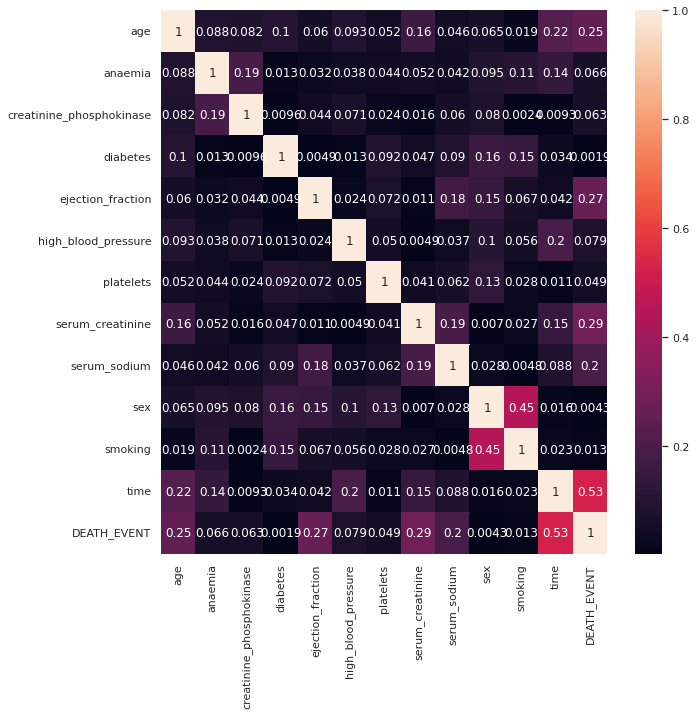

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True);

**Models**

In [ ]:
!pip install pycaret

In [12]:
from pycaret.regression import*

In [13]:
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [ ]:
df

In [22]:
exp_name=setup(data=df,target="DEATH_EVENT")

,Description,Value
0,session_id,1215
1,Target,DEATH_EVENT
2,Original Data,"(299, 13)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(209, 28)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='DEATH_EVENT', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [23]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2388,1.117000e-01,0.3272,4.536000e-01,0.2345,0.3177,0.099
et,Extra Trees Regressor,0.2129,1.167000e-01,0.3368,4.299000e-01,0.2359,0.3160,0.401
rf,Random Forest Regressor,0.2114,1.199000e-01,0.3371,4.041000e-01,0.2357,0.3058,0.551
gbr,Gradient Boosting Regressor,0.2349,1.338000e-01,0.3598,3.206000e-01,0.2518,0.3353,0.064
ridge,Ridge Regression,0.3021,1.386000e-01,0.3693,3.133000e-01,0.2630,0.4217,0.015
ada,AdaBoost Regressor,0.3359,1.389000e-01,0.3712,2.982000e-01,0.2721,0.3948,0.090
lr,Linear Regression,0.3061,1.440000e-01,0.3770,2.847000e-01,0.2674,0.4277,0.426
omp,Orthogonal Matching Pursuit,0.3195,1.507000e-01,0.3856,2.544000e-01,0.2720,0.4814,0.013
huber,Huber Regressor,0.3313,1.583000e-01,0.3940,2.163000e-01,0.2806,0.4903,0.029
br,Bayesian Ridge,0.3309,1.579000e-01,0.3947,2.150000e-01,0.2815,0.4895,0.016


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1215, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=2)

In [15]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))

In [16]:
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=20)#random_state=1
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR: 0.820076 (0.126197)
DT: 0.757576 (0.144119)
LDA: 0.793939 (0.118618)
KNN: 0.638258 (0.087822)
NB: 0.753409 (0.114152)
SVM: 0.665152 (0.037697)
RFC: 0.815909 (0.130780)


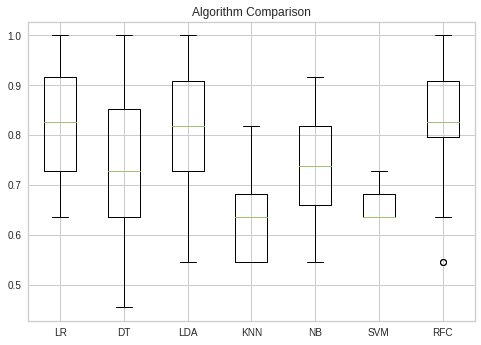

In [17]:
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()

In [18]:
#Logistic Regression Classifier
lrc = LogisticRegression(solver='liblinear',multi_class='ovr')
lrc.fit(X_train,y_train)
pred_y=lrc.predict(X_val)

#Accuracy
print('Accuracy of the LRC:',accuracy_score(y_val.values,pred_y))

Accuracy of the LRC: 0.8933333333333333


In [19]:
#Random Forest Classifier 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_y=rf.predict(X_val)

#Accuracy
print('Accuracy of the RFC:',accuracy_score(y_val.values,pred_y))

Accuracy of the RFC: 0.9066666666666666
